In [1]:
%matplotlib inline
import glob
import numpy as np
import matplotlib.pyplot as plt

seating rssi max :  -41.0
seating rssi min :  -57.0
seating rssi mean :  -47.266603070773144
seating rssi median :  -47.0
seating rssi width :  16.0


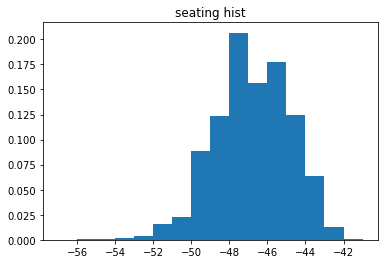

seating rssi max :  -38.0
seating rssi min :  -76.0
seating rssi mean :  -49.74556451612903
seating rssi median :  -52.0
seating rssi width :  38.0


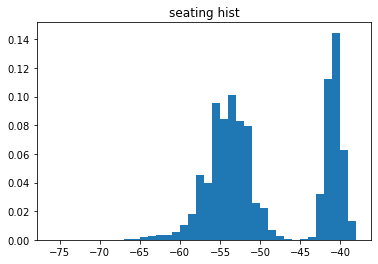

not seating rssi max :  -43.0
not seating rssi min :  -56.0
not seating rssi mean :  -47.65959146980972
not seating rssi median :  -48.0
not seating rssi width :  13.0


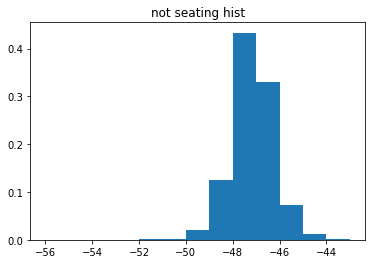

not seating rssi max :  -37.0
not seating rssi min :  -63.0
not seating rssi mean :  -48.97720172253652
not seating rssi median :  -51.0
not seating rssi width :  26.0


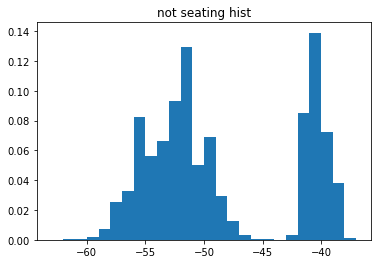

In [4]:
#file_paths = glob.glob(".\\data2\\*")
#print(file_paths)

print('='* 100)


d = np.loadtxt('.\\data2\\20200402_seating.csv', delimiter=',')
s_cat, s_rssi = np.hsplit(d, [1])

s_rssi_max = s_rssi.max()
s_rssi_min = s_rssi.min()
s_rssi_mean = s_rssi.mean()
s_rssi_median = np.median(s_rssi)
s_rssi_width = np.abs(s_rssi.max()-s_rssi.min())

print('seating rssi max : ', s_rssi_max)
print('seating rssi min : ', s_rssi_min)
print('seating rssi mean : ', s_rssi_mean)
print('seating rssi median : ', s_rssi_median)
print('seating rssi width : ', s_rssi_width)

(a_hist3, a_bins3, _) = plt.hist(s_rssi, bins=int(s_rssi_width), density=True)
plt.title('seating hist')
plt.show()


print('='* 100)


d = np.loadtxt('.\\data2\\20200406_seating.csv', delimiter=',')
s_cat, s_rssi = np.hsplit(d, [1])

s_rssi_max = s_rssi.max()
s_rssi_min = s_rssi.min()
s_rssi_mean = s_rssi.mean()
s_rssi_median = np.median(s_rssi)
s_rssi_width = np.abs(s_rssi.max()-s_rssi.min())

print('seating rssi max : ', s_rssi_max)
print('seating rssi min : ', s_rssi_min)
print('seating rssi mean : ', s_rssi_mean)
print('seating rssi median : ', s_rssi_median)
print('seating rssi width : ', s_rssi_width)

(a_hist3, a_bins3, _) = plt.hist(s_rssi, bins=int(s_rssi_width), density=True)
plt.title('seating hist')
plt.show()


print('='* 100)


d = np.loadtxt('.\\data2\\20200402_not_seating.csv', delimiter=',')
ns_cat, ns_rssi = np.hsplit(d, [1])

ns_rssi_max = ns_rssi.max()
ns_rssi_min = ns_rssi.min()
ns_rssi_mean = ns_rssi.mean()
ns_rssi_median = np.median(ns_rssi)
ns_rssi_width = np.abs(ns_rssi.max()-ns_rssi.min())

print('not seating rssi max : ', ns_rssi_max)
print('not seating rssi min : ', ns_rssi_min)
print('not seating rssi mean : ', ns_rssi_mean)
print('not seating rssi median : ', ns_rssi_median)
print('not seating rssi width : ', ns_rssi_width)

(a_hist3, a_bins3, _) = plt.hist(ns_rssi, bins=int(ns_rssi_width), density=True)
plt.title('not seating hist')
plt.show()


print('='* 100)


d = np.loadtxt('.\\data2\\20200406_not_seating.csv', delimiter=',')
ns_cat, ns_rssi = np.hsplit(d, [1])

ns_rssi_max = ns_rssi.max()
ns_rssi_min = ns_rssi.min()
ns_rssi_mean = ns_rssi.mean()
ns_rssi_median = np.median(ns_rssi)
ns_rssi_width = np.abs(ns_rssi.max()-ns_rssi.min())

print('not seating rssi max : ', ns_rssi_max)
print('not seating rssi min : ', ns_rssi_min)
print('not seating rssi mean : ', ns_rssi_mean)
print('not seating rssi median : ', ns_rssi_median)
print('not seating rssi width : ', ns_rssi_width)

(a_hist3, a_bins3, _) = plt.hist(ns_rssi, bins=int(ns_rssi_width), density=True)
plt.title('not seating hist')
plt.show()

## 

all data count :  7159


([<matplotlib.patches.Wedge at 0x2471791bf88>,
 [Text(1.018720687470811, 0.41497971145466656, 'Seating'),
  Text(-1.0187207263240112, -0.4149796160751504, 'NOT Seating')],
 [Text(0.5556658295295333, 0.22635256988436356, '37.7%'),
  Text(-0.5556658507221879, -0.2263525178591729, '62.3%')])

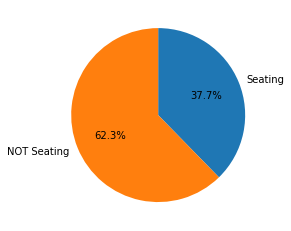

In [6]:
#file_paths = glob.glob(".\\data\\*")
file_paths = glob.glob("./data/*")
#print(file_paths)

category =np.empty((0,1), float)
rssi =np.empty((0,100), float)

for file in file_paths:
    d = np.loadtxt(file, delimiter=',')
    category_tmp, rssi_tmp = np.hsplit(d, [1])
    rssi = np.concatenate([rssi, rssi_tmp], axis=0)
    category = np.concatenate([category, category_tmp], axis=0)

all_data_count = category.shape[0]
seating_data_count = np.count_nonzero(category > 0)
print("all data count : ", all_data_count)

data_pie = [seating_data_count, all_data_count - seating_data_count]
label = ["Seating", "NOT Seating"]
plt.pie(data_pie, labels=label, counterclock=False, startangle=90, autopct="%1.1f%%")

(7159, 101)


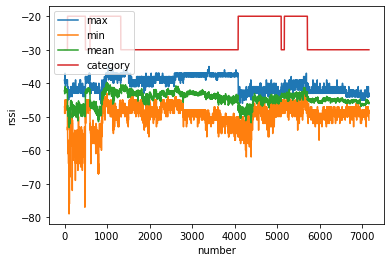

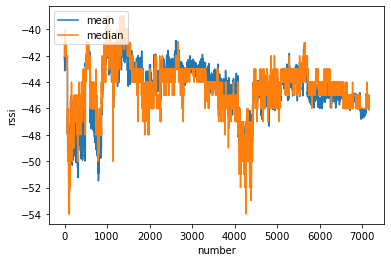

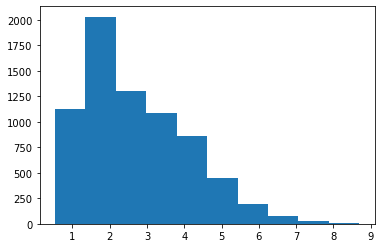

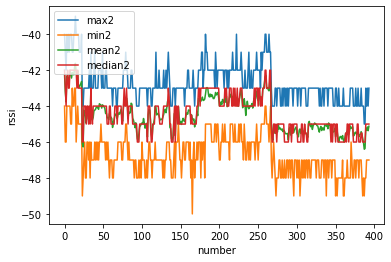

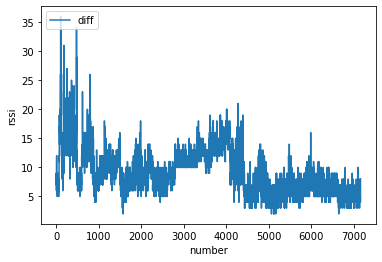

In [8]:
#file_paths = glob.glob(".\\data\\*")
file_paths = glob.glob("./data/*")

all_data = np.empty((0,101), float)

for file in file_paths:
    d = np.loadtxt(file, delimiter=',')
    all_data = np.concatenate([all_data, d], axis=0)
print(all_data.shape)

seating_data = np.empty((0,101), float)
not_seating_data = np.empty((0,101), float)
max_data = []
min_data = []
mean_data = []
median_data = []
std_data = []
diff_data = []
category_data = []
for data in all_data:
    #print(data)
    #if data[0] == 1.0:
    category_data.append(data[0]*10-30)
    data = np.delete(data, 0)
    max_data.append(data.max())
    min_data.append(data.min())
    diff_data.append(data.max() - data.min())
    mean_data.append(data.mean())
    median_data.append(np.median(data))
    std_data.append(np.std(data))

max_data2 = []
min_data2 = []
mean_data2 = []
median_data2 = []
std_data2 = []
category_data2 = []
for i in range(len(std_data)):
    if std_data[i] < 1.0:
        max_data2.append(max_data[i])
        min_data2.append(min_data[i])
        mean_data2.append(mean_data[i])
        median_data2.append(median_data[i])
        category_data2.append(category_data[i])

plt.plot(max_data)
plt.plot(min_data)
plt.plot(mean_data)
plt.plot(category_data)
#plt.title('max rssi')
plt.ylabel('rssi')
plt.xlabel('number')
plt.legend(['max', 'min', 'mean', 'category'], loc='upper left')
plt.show()

plt.plot(mean_data)
plt.plot(median_data)
#plt.plot(category_data)
#plt.title('max rssi')
plt.ylabel('rssi')
plt.xlabel('number')
plt.legend(['mean', 'median'], loc='upper left')
plt.show()

plt.hist(std_data)
plt.show()

plt.plot(max_data2)
plt.plot(min_data2)
plt.plot(mean_data2)
plt.plot(median_data2)
#plt.plot(category_data2)
#plt.title('max rssi')
plt.ylabel('rssi')
plt.xlabel('number')
plt.legend(['max2', 'min2', 'mean2', 'median2', 'category2'], loc='upper left')
plt.show()

plt.plot(diff_data)
#plt.plot(category_data)
#plt.title('max rssi')
plt.ylabel('rssi')
plt.xlabel('number')
plt.legend(['diff', 'category2'], loc='upper left')
plt.show()

['.\\data2\\20200402_not_seating.csv', '.\\data2\\20200402_seating.csv', '.\\data2\\20200406_not_seating.csv', '.\\data2\\20200406_seating.csv']


c:\anaconda3\envs\py37_tf2\lib\site-packages\ipykernel_launcher.py:47: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


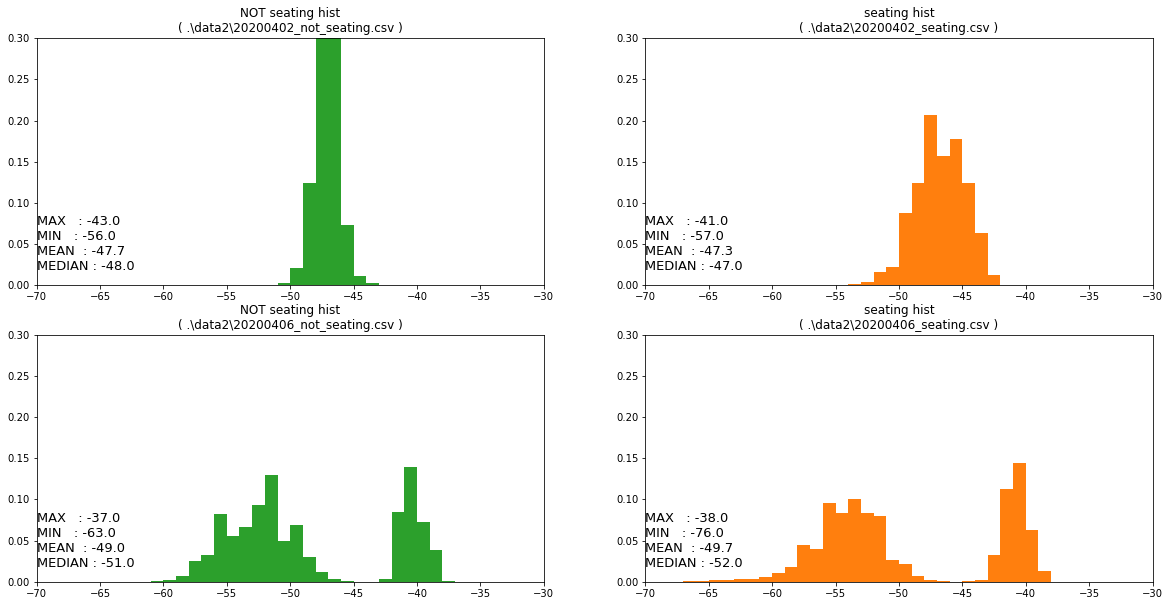

In [3]:
file_paths = glob.glob(".\\data2\\*")
print(file_paths)

fig = plt.figure(figsize=(20,10))
GRAPHE_NUM = 4
X_LIM_MAX = -30
X_LIM_MIN = -70
X_TICKS = 9
Y_LIM_MAX = 0.3
Y_LIM_MIN = 0
Y_TICKS = 7

graph_count = 1
for file in file_paths:
    d = np.loadtxt(file, delimiter=',')

    cat, rssi = np.hsplit(d, [1])

    rssi_max = rssi.max()
    rssi_min = rssi.min()
    rssi_mean = rssi.mean()
    rssi_median = np.median(rssi)
    rssi_width = np.abs(rssi.max()-rssi.min())

    ax = fig.add_subplot(GRAPHE_NUM/2, 2, graph_count)
    plt.xlim(X_LIM_MIN, X_LIM_MAX)
    plt.xticks(np.linspace(X_LIM_MIN, X_LIM_MAX, X_TICKS))
    plt.ylim(Y_LIM_MIN, Y_LIM_MAX)
    plt.yticks(np.linspace(Y_LIM_MIN, Y_LIM_MAX, Y_TICKS))
    
    plt.text(X_LIM_MIN, Y_LIM_MIN,\
             'MAX   : ' + '{:.1f}'.format(rssi_max) + '\n'\
             'MIN   : ' + '{:.1f}'.format(rssi_min) + '\n'\
             'MEAN  : ' + '{:.1f}'.format(rssi_mean) + '\n'\
             'MEDIAN : ' + '{:.1f}'.format(rssi_median) + '\n'\
             , fontsize=13)
    
    if graph_count % 2 == 1:
        plt.title('NOT seating hist\n( ' + file + ' )')
        (a_hist3, a_bins3, _) = ax.hist(rssi, bins=int(rssi_width), density=True, color="tab:green")
    else:
        plt.title('seating hist\n( ' + file + ' )')
        (a_hist3, a_bins3, _) = ax.hist(rssi, bins=int(rssi_width), density=True, color="tab:orange")
    
    graph_count += 1

fig.show()
